# 1.Logistic Regression to Predict the Probability of Default of an Individual

In order to predict a bank loan default, I chose a borrowing dataset that I sourced from Kaggle. This dataset was based on the loans provided to loan applicants. It has many characteristics and my task is to predict loan defaults based on borrower-level features using a multiple logistic regression model

Probability of default measures the degree of likelihood that the borrower of a loan or debt (the obligor) will be unable to make the necessary scheduled repayments on the debt, thereby defaulting on the debt. Should the obligor be unable to pay, the debt is in default, and the lenders of the debt have legal avenues to attempt a recovery of the debt, or at least partial repayment of the entire debt. The higher the default probability a lender estimates a borrower to have, the higher the interest rate the lender will charge the borrower as compensation for bearing the higher default risk.

Objective: Come up with a model that can be deployed to predict approval and non approval for new clients

# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
!pip install imblearn

In [3]:
data = pd.read_excel("/Users/arthurkyazze/Desktop/Docs/Kaggle:Github data sets/credit_risk_dataset.xlsx")

In [4]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(28638, 13)
['ID', 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


In [5]:
data.head()

,ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0,0.59,Y,3
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,1,0.10,N,2
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0,0.57,N,3
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0,0.53,N,2
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0,0.55,Y,4


In [6]:
data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [7]:
data['loan_status'].value_counts()

1    22435
0     6203
Name: loan_status, dtype: int64

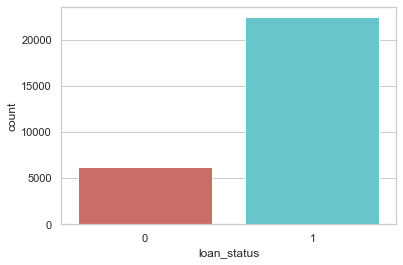

In [8]:
sns.countplot(x='loan_status', data=data, palette='hls')
plt.show()

In [9]:
count_no_default = len(data[data['loan_status']==0])
count_default = len(data[data['loan_status']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default", pct_of_default*100)

 percentage of no default is 21.660032125148405
 percentage of default 78.3399678748516


In [10]:
data.groupby('loan_status').mean()

,ID,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,,
0,15173.938094,27.447203,50054.547477,4.135741,11023.351604,13.123975,0.246311,5.673545
1,16602.712458,27.804636,71237.635569,4.969200,9278.573657,10.463636,0.148247,5.826967


Observations:

    The average age of loan applicants who defaulted on their loans is slightly less than that of the loan applicants who didn’t.
    People with more income are less likely to default than those who make less income 
    People with bigger loans are more likely to default than people with less loans
    Percentage of income compared to loan also show that people who people with a less percentage of loan compared to income default less compared to those who don't

In [11]:
data.groupby('person_home_ownership').mean()

,ID,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_home_ownership,,,,,,,,,
MORTGAGE,17705.635709,27.984323,81602.937632,5.891280,10635.755444,10.525132,0.874163,0.151044,5.903906
OTHER,14840.074468,26.904255,79079.861702,3.840426,11128.989362,12.030638,0.712766,0.189681,5.361702
OWN,16853.250000,27.775091,59549.615420,5.176095,9130.748175,10.963855,0.933394,0.184808,5.918339
RENT,15072.798708,27.516803,55511.111333,3.842210,8931.989210,11.462372,0.687650,0.182008,5.688406


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

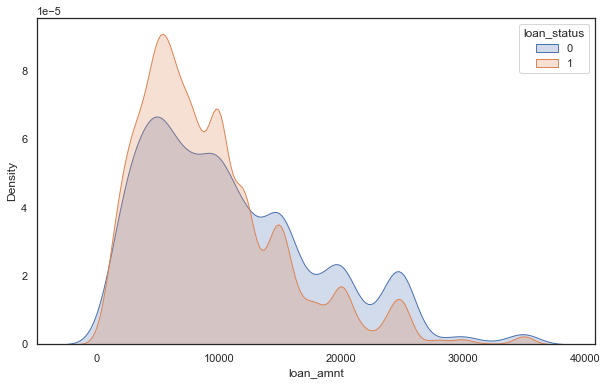

In [12]:
import seaborn as sns
sns.set(style="white")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0 , 6.0)
sns.kdeplot( data['loan_amnt'].loc[data['loan_status'] == 0], hue=data['loan_status'], shade=True)
sns.kdeplot( data['loan_amnt'].loc[data['loan_status'] == 1], hue=data['loan_status'], shade=True)

In [13]:
data['loan_amnt'].loc[data['loan_status'] == 0].describe()

count     6203.000000
mean     11023.351604
std       7161.100407
min        900.000000
25%       5000.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [14]:
data['loan_amnt'].loc[data['loan_status'] == 1].describe()

count    22435.000000
mean      9278.573657
std       6025.480030
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

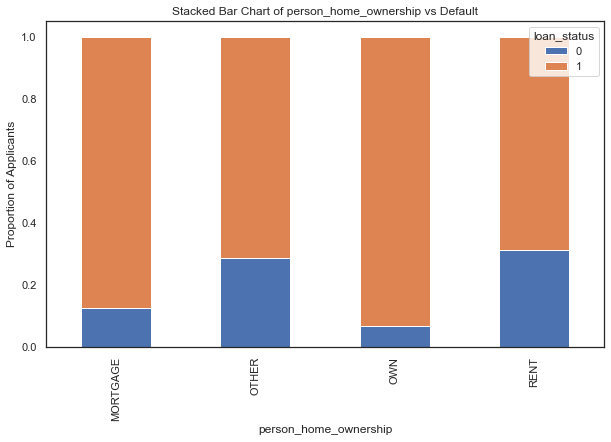

In [15]:
table=pd.crosstab(data.person_home_ownership,data.loan_status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of person_home_ownership vs Default')
plt.xlabel('person_home_ownership')
plt.ylabel('Proportion of Applicants')
plt.savefig('person_home_ownership_vs_def_stack')

Person home ownership does seem to be a strong predictor for the target variable

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

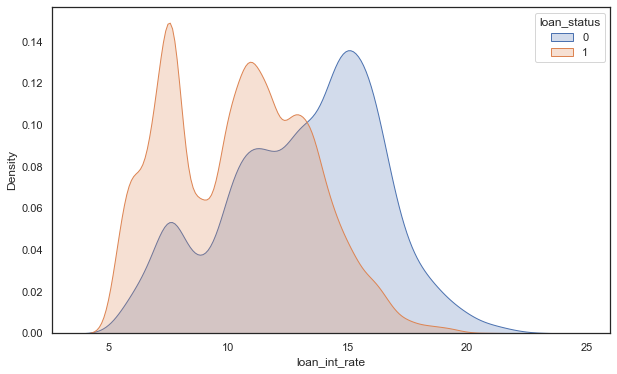

In [16]:
import seaborn as sns
sns.set(style="white")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0 , 6.0)
sns.kdeplot( data['loan_int_rate'].loc[data['loan_status'] == 0], hue=data['loan_status'], shade=True)
sns.kdeplot( data['loan_int_rate'].loc[data['loan_status'] == 1], hue=data['loan_status'], shade=True)

In [17]:
data['loan_int_rate'].loc[data['loan_status'] == 0].describe()

count    6203.000000
mean       13.123975
std         3.262529
min         5.420000
25%        10.910000
50%        13.490000
75%        15.580000
max        23.220000
Name: loan_int_rate, dtype: float64

In [18]:
data['loan_int_rate'].loc[data['loan_status'] == 1].describe()

count    22435.000000
mean        10.463636
std          2.972669
min          5.420000
25%          7.740000
50%         10.620000
75%         12.690000
max         22.060000
Name: loan_int_rate, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='loan_percent_income', ylabel='Density'>

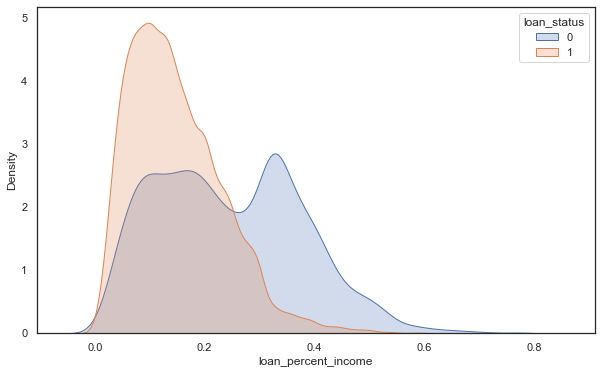

In [19]:
import seaborn as sns
sns.set(style="white")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0 , 6.0)
sns.kdeplot( data['loan_percent_income'].loc[data['loan_status'] == 0], hue=data['loan_status'], shade=True)
sns.kdeplot( data['loan_percent_income'].loc[data['loan_status'] == 1], hue=data['loan_status'], shade=True)

In [20]:
data['loan_percent_income'].loc[data['loan_status'] == 0].describe()

count    6203.000000
mean        0.246311
std         0.132724
min         0.010000
25%         0.140000
50%         0.240000
75%         0.340000
max         0.780000
Name: loan_percent_income, dtype: float64

In [21]:
data['loan_percent_income'].loc[data['loan_status'] == 1].describe()

count    22435.000000
mean         0.148247
std          0.086581
min          0.000000
25%          0.080000
50%          0.130000
75%          0.200000
max          0.830000
Name: loan_percent_income, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='person_income', ylabel='Density'>

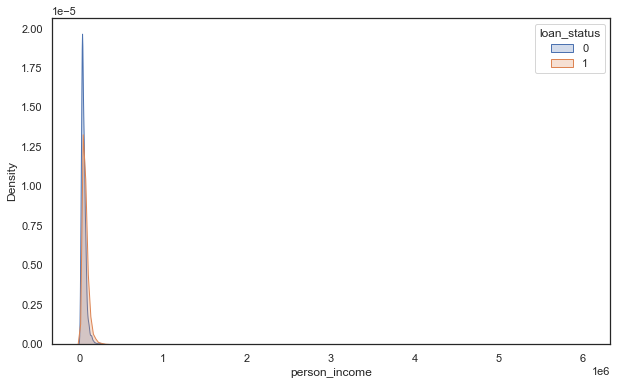

In [22]:
import seaborn as sns
sns.set(style="white")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0 , 6.0)
sns.kdeplot( data['person_income'].loc[data['loan_status'] == 0], hue=data['loan_status'], shade=True)
sns.kdeplot( data['person_income'].loc[data['loan_status'] == 1], hue=data['loan_status'], shade=True)

In [23]:
data['person_income'].loc[data['loan_status'] == 0].describe()

count      6203.000000
mean      50054.547477
std       36896.713589
min        4000.000000
25%       30000.000000
50%       42000.000000
75%       60000.000000
max      703800.000000
Name: person_income, dtype: float64

In [24]:
data['person_income'].loc[data['loan_status'] == 1].describe()

count    2.243500e+04
mean     7.123764e+04
std      6.700667e+04
min      7.200000e+03
25%      4.250400e+04
50%      6.000000e+04
75%      8.500000e+04
max      6.000000e+06
Name: person_income, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='person_age', ylabel='Density'>

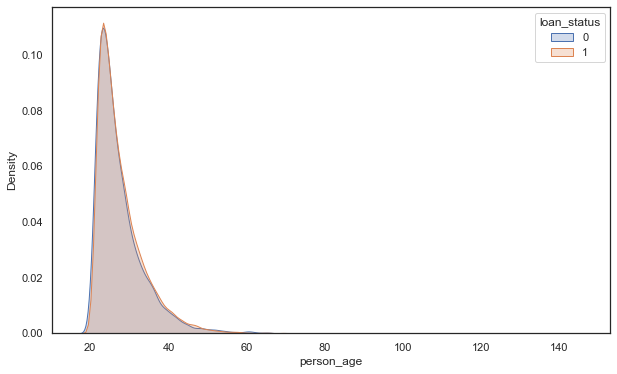

In [25]:
import seaborn as sns
sns.set(style="white")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0 , 6.0)
sns.kdeplot( data['person_age'].loc[data['loan_status'] == 0], hue=data['loan_status'], shade=True)
sns.kdeplot( data['person_age'].loc[data['loan_status'] == 1], hue=data['loan_status'], shade=True)

In [26]:
data['person_age'].loc[data['loan_status'] == 0].describe()

count    6203.000000
mean       27.447203
std         6.212141
min        20.000000
25%        23.000000
50%        26.000000
75%        30.000000
max        70.000000
Name: person_age, dtype: float64

In [27]:
data['person_age'].loc[data['loan_status'] == 1].describe()

count    22435.000000
mean        27.804636
std          6.335304
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='cb_person_cred_hist_length', ylabel='Density'>

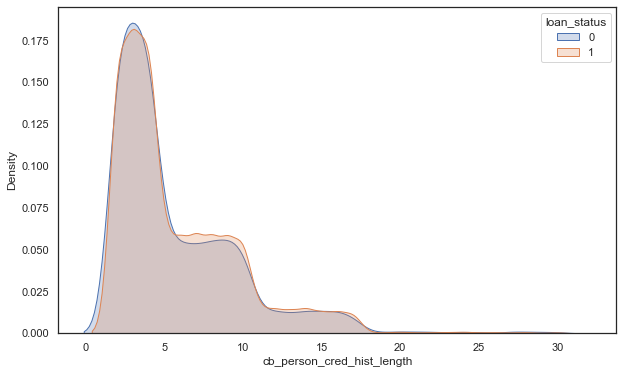

In [28]:
import seaborn as sns
sns.set(style="white")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0 , 6.0)
sns.kdeplot( data['cb_person_cred_hist_length'].loc[data['loan_status'] == 0], hue=data['loan_status'], shade=True)
sns.kdeplot( data['cb_person_cred_hist_length'].loc[data['loan_status'] == 1], hue=data['loan_status'], shade=True)

In [29]:
data['cb_person_cred_hist_length'].loc[data['loan_status'] == 0].describe()

count    6203.000000
mean        5.673545
std         4.087560
min         2.000000
25%         3.000000
50%         4.000000
75%         8.000000
max        30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [30]:
data['cb_person_cred_hist_length'].loc[data['loan_status'] == 1].describe()

count    22435.000000
mean         5.826967
std          4.024266
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

# 3. Data Preparation

In [31]:
cat_vars=['person_home_ownership']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['person_home_ownership']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [32]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data.columns.values:
    # Compare if the dtype is object
    if data[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col])

In [33]:
data

,ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,1,22,59000,3,123.0,4,3,35000,16.02,0,0.59,1,3,0,0,0,1
1,2,21,9600,2,5.0,1,1,1000,11.14,1,0.10,0,2,0,0,1,0
2,3,25,9600,0,1.0,3,2,5500,12.87,0,0.57,0,3,1,0,0,0
3,4,23,65500,3,4.0,3,2,35000,15.23,0,0.53,0,2,0,0,0,1
4,5,24,54400,3,8.0,3,2,35000,14.27,0,0.55,1,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32577,57,53000,0,1.0,4,2,5800,13.16,1,0.11,0,30,1,0,0,0
32577,32578,54,120000,0,4.0,4,0,17625,7.49,1,0.15,0,19,1,0,0,0
32578,32579,65,76000,3,3.0,2,1,35000,10.99,0,0.46,0,28,0,0,0,1
32579,32580,56,150000,0,5.0,4,1,15000,11.48,1,0.10,0,26,1,0,0,0


In [34]:
# Create feature and target variable for problem
X_class= data.drop('loan_status', axis=1)
y_class = data['loan_status']

In [35]:
y_class.value_counts()

1    22435
0     6203
Name: loan_status, dtype: int64

In [36]:
 # Dealing with imbalanced data set

from imblearn.over_sampling import SMOTE
smote = SMOTE (sampling_strategy='minority')
X_sm, y_sm = smote. fit_resample(X_class,y_class)

y_sm.value_counts()

0    22435
1    22435
Name: loan_status, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X_sm,y_sm,train_size=0.75,random_state=15)

In [39]:
x_train.shape

(33652, 16)

Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [40]:
from sklearn.feature_selection import RFE

In [41]:
# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=8)
rfe.fit(x_train,y_train)

# Print the selected features
print(rfe.support_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False False False  True False False False False  True  True  True False
  True  True  True  True]


In [42]:
x_train.columns

Index(['ID', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

In [43]:
data_X1 = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
3,person_home_ownership,1
8,loan_int_rate,1
9,loan_percent_income,1
10,cb_person_default_on_file,1
12,person_home_ownership_MORTGAGE,1
13,person_home_ownership_OTHER,1
14,person_home_ownership_OWN,1
15,person_home_ownership_RENT,1
5,loan_intent,2
6,loan_grade,3


In [44]:
cols=[]
for i in range (0, len(data_X1["Importance"])):
    if data_X1["Importance"][i] == 1:
        cols.append(data_X1["Feature"][i])
print(cols)
print(len(cols))

['person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']
8


The RFE has helped us select the following features: 
    'ID', 'person_age', 'person_income', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate

In [45]:
X=x_train[cols]
y=y_train

# 4. Modeling

In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.438883
         Iterations: 35
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.367     
Dependent Variable:        loan_status             AIC:                     29554.5882
Date:                      2023-09-25 17:47        BIC:                     29621.9788
No. Observations:          33652                   Log-Likelihood:          -14769.   
Df Model:                  7                       LL-Null:                 -23326.   
Df Residuals:              33644                   LLR p-value:             0.0000    
Converged:                 0.0000                  Scale:                   1.0000    
No. Iterations:            35.0000                                                    
--------------------------------------------------------------------------------------
                                Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
-------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
person_home_ownership,9.921521e-01
loan_int_rate,0.000000e+00
loan_percent_income,0.000000e+00
cb_person_default_on_file,1.504158e-87
person_home_ownership_MORTGAGE,0.000000e+00
person_home_ownership_OTHER,9.883514e-01
person_home_ownership_OWN,9.900687e-01
person_home_ownership_RENT,9.911959e-01


In [48]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])

if 'const' in pvs:
    pvs.remove('const')
else:
    pvs
print(pvs)
print(len(pvs))

['loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'person_home_ownership_MORTGAGE']
4


In [49]:
X=x_train[pvs]
y=y_train

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.603161
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                33652
Model:                          Logit   Df Residuals:                    33648
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.1298
Time:                        17:47:26   Log-Likelihood:                -20298.
converged:                       True   LL-Null:                       -23326.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
loan_int_rate                     -0.0011      0.002     -0.549     

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# 5. Evaluation

In [51]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.77


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4264 1340]
 [1247 4255]]


In [53]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  8519 correct predictions
 The result is telling us that we have:  2587 incorrect predictions
 We have a total predictions of:  11106


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      5604
           1       0.76      0.77      0.77      5502

    accuracy                           0.77     11106
   macro avg       0.77      0.77      0.77     11106
weighted avg       0.77      0.77      0.77     11106



Interpretations:

    The precision of class 1 in the test set, that is the positive predicted value of our model, tells us out of all the “bad” loan applicants which our model has identified how many were actually “bad” loan applicants. So, 77% of the “bad” loan applicants which our model managed to identify were actually “bad” loan applicants.
    The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “bad” loan applicants our model has managed to identify out of all the “bad” loan applicants existing in our test set. So, our model managed to identify 77% “bad” loan applicants out of all the “bad” loan applicants existing in the test set.

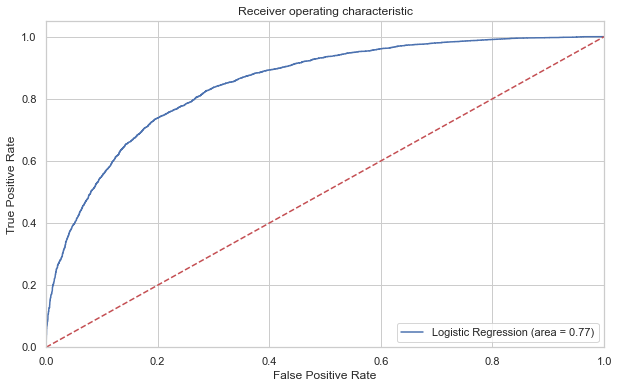

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 6. Deployment

Finally, the best way to use the model we have built is to assign a probability to default to each of the loan applicant. In order to obtain the probability of probability to default from our model, we will use the following code:

In [56]:
data['PD'] = logreg.predict_proba(data[X_train.columns])[:,1]
data[['ID', 'PD']].head(10)

,ID,PD
0,1,0.014544
1,2,0.639610
2,3,0.060170
3,4,0.013102
4,5,0.036812
5,6,0.696738
6,7,0.064843
7,8,0.107667
8,9,0.239500
9,10,0.230268


In [57]:
X_train.columns

Index(['loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'person_home_ownership_MORTGAGE'],
      dtype='object')

#### So, our Logistic Regression model is a good model for predicting the probability of default. Now how do we predict the probability of default for new loan applicant?Suppose there is a new loan applicant, which has: loan_int_rate:12.02, loan_percent_income:0.42, cb_person_default_on_file:Y and person_home_ownership_MORTGAGE:1 . We can take these new data and use it to predict the probability of default for new loan applicant.

In [58]:
new_data = np.array([12.02,0.42,1,1]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of paying off the new loan")

 This new loan applicant has a 40.58% chance of paying off the new loan


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
